In [1]:
#Importing all the required libraries and packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import flexcluster
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [2]:
#loading dataset using pandas
df = pd.read_csv('mcdonalds.csv')


In [82]:
data1=pd.read_csv("mcdonalds.csv")

In [3]:
#storing the dataframe in df variable
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
#cheking dataframe column names
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
like_values = df['Like'].unique()

In [6]:
like_values

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [7]:
like_values[1]

'+2'

In [8]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [9]:
df['Age'].unique()

array([61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 28, 65, 54, 67, 34, 31,
       47, 37, 41, 36, 50, 39, 35, 20, 24, 44, 40, 48, 38, 57, 60, 66, 42,
       26, 52, 29, 25, 22, 45, 18, 68, 43, 21, 27, 33, 63, 46, 59, 19, 64,
       70, 30, 71])

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
# Describing the dataset and exploring
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [13]:
#checking the dimension
df.ndim

2

In [14]:
#checking the shape of dataframe
df.shape

(1453, 15)

In [15]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [16]:
# we will use first 11 columns and convert it into binary 0 & 1
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [17]:
#storing first 11 column names for converting them into 0 and 1
df_column_names = df.columns[0:11]

In [18]:
df_column_names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [19]:
for x in df_column_names:
    print(x)

yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting


In [20]:
# convert first 11 columns in 0 & 1
for x in df_column_names:
    df[x] = df[x].replace('Yes',1)
    df[x] = df[x].replace('No',0)

In [21]:
# taking only 0 and 1 value in df_x
df_x = df.loc[:,'yummy':'disgusting']

In [22]:
df['yummy'].mean()

0.5526496902959395

In [23]:
for x in df_column_names:
    print(x)
    mean = df[x].mean()
    print(round(mean,2))
    


yummy
0.55
convenient
0.91
spicy
0.09
fattening
0.87
greasy
0.53
fast
0.9
cheap
0.6
tasty
0.64
expensive
0.36
healthy
0.2
disgusting
0.24


In [24]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [25]:
# Checking for null values
pd.isnull(df).sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [26]:
df_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [27]:
pca = PCA()
MD_pca = pca.fit_transform(df_x)

In [28]:
# pca components
MD_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [29]:
MD_pca.shape

(1453, 11)

In [30]:
df_x.shape

(1453, 11)

In [31]:
# Get the summary information
variance_explained_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = variance_explained_ratio.cumsum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': variance_explained_ratio,
    'Cumulative Proportion': cumulative_var_ratio
}, index=range(1, len(variance_explained_ratio) + 1))

print(summary_df)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
1             0.757050                0.299447               0.299447
2             0.607456                0.192797               0.492244
3             0.504619                0.133045               0.625290
4             0.398799                0.083096               0.708386
5             0.337405                0.059481               0.767866
6             0.310275                0.050300               0.818166
7             0.289697                0.043849               0.862015
8             0.275122                0.039548               0.901563
9             0.265251                0.036761               0.938323
10            0.248842                0.032353               0.970677
11            0.236903                0.029323               1.000000


In [32]:
MD_pca = pd.DataFrame(summary_df)

In [33]:
print(MD_pca)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
1             0.757050                0.299447               0.299447
2             0.607456                0.192797               0.492244
3             0.504619                0.133045               0.625290
4             0.398799                0.083096               0.708386
5             0.337405                0.059481               0.767866
6             0.310275                0.050300               0.818166
7             0.289697                0.043849               0.862015
8             0.275122                0.039548               0.901563
9             0.265251                0.036761               0.938323
10            0.248842                0.032353               0.970677
11            0.236903                0.029323               1.000000


In [34]:
#
print(MD_pca.round(1))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
1                  0.8                     0.3                    0.3
2                  0.6                     0.2                    0.5
3                  0.5                     0.1                    0.6
4                  0.4                     0.1                    0.7
5                  0.3                     0.1                    0.8
6                  0.3                     0.1                    0.8
7                  0.3                     0.0                    0.9
8                  0.3                     0.0                    0.9
9                  0.3                     0.0                    0.9
10                 0.2                     0.0                    1.0
11                 0.2                     0.0                    1.0


In [35]:
pca = PCA()
MD_pca = pca.fit_transform(df_x)

# Display summary
summary_data = pd.DataFrame({
    'Standard Deviation': pca.explained_variance_,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
}, index=np.arange(1, pca.n_components_ + 1))

print(summary_data)

# Display factor loadings
loadings_data = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)], index=df_x.columns)

print(loadings_data.round(3))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
1             0.573124                0.299447               0.299447
2             0.369002                0.192797               0.492244
3             0.254641                0.133045               0.625290
4             0.159040                0.083096               0.708386
5             0.113842                0.059481               0.767866
6             0.096270                0.050300               0.818166
7             0.083925                0.043849               0.862015
8             0.075692                0.039548               0.901563
9             0.070358                0.036761               0.938323
10            0.061922                0.032353               0.970677
11            0.056123                0.029323               1.000000
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
conven

In [36]:
df_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [37]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


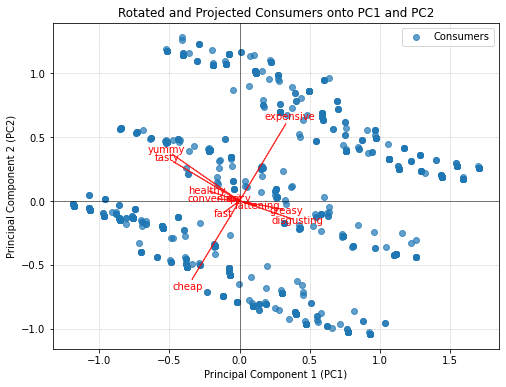

In [38]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named "MD.x" in Python
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(df_x)

# Create a DataFrame for the rotated and projected data
rotated_projected_data = pd.DataFrame(MD_pca[:, :2], columns=['PC1', 'PC2'])

# Plot the rotated and projected data
plt.figure(figsize=(8, 6))
plt.scatter(rotated_projected_data['PC1'], rotated_projected_data['PC2'], alpha=0.7, label='Consumers')

# Add arrows for original variables (loadings)
for i, variable in enumerate(df_x.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.75)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, variable, color='r', ha='center', va='center')

# Customize the plot
plt.title('Rotated and Projected Consumers onto PC1 and PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.legend()

# Show the plot
plt.show()


## step 5 : extracting segments

/home/user/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


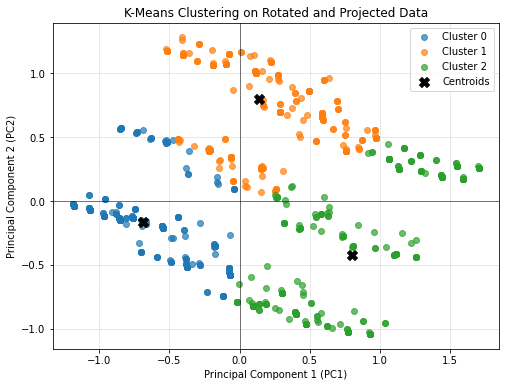

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named "df_x" in Python
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(df_x)

# Create a DataFrame for the rotated and projected data
rotated_projected_data = pd.DataFrame(MD_pca[:, :2], columns=['PC1', 'PC2'])

# Specify the number of clusters for k-means
n_clusters = 3  # You can adjust this based on your requirements

# Fit k-means to the rotated and projected data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rotated_projected_data['Cluster'] = kmeans.fit_predict(rotated_projected_data[['PC1', 'PC2']])

# Plot the clustered data
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = rotated_projected_data[rotated_projected_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='black', s=100, label='Centroids')

# Customize the plot
plt.title('K-Means Clustering on Rotated and Projected Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

# Show the plot
plt.show()


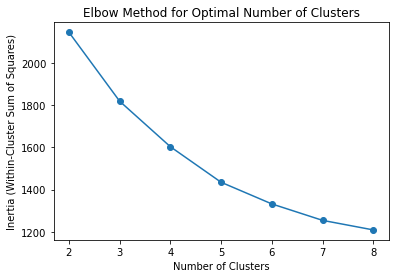

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df_x" in Python
# Specify the range of clusters (2 to 8) and the number of random starts (10)
cluster_range = range(2, 9)
n_random_starts = 10

# Initialize an empty list to store k-means models
kmeans_models = []

# Perform k-means clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_random_starts, random_state=42)
    kmeans.fit(df_x)
    kmeans_models.append(kmeans)

# Visualize the results using the Elbow Method (optional)
inertia_values = [kmeans.inertia_ for kmeans in kmeans_models]

plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()


/home/user/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


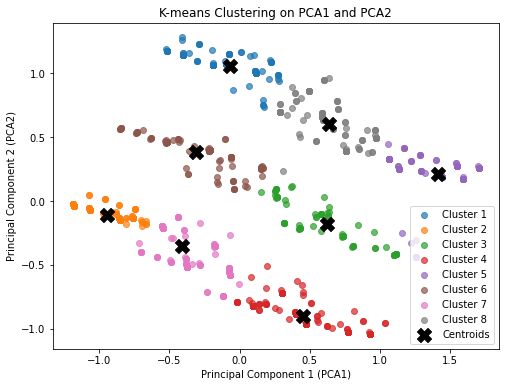

In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df_x" in Python
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_x)

# Create a DataFrame for the rotated and projected data
rotated_projected_data = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Perform k-means clustering on PCA1 and PCA2
num_clusters = 8  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=1234)
rotated_projected_data['Cluster'] = kmeans.fit_predict(pca_result)

# Plot the clustered data
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = rotated_projected_data[rotated_projected_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster + 1}', alpha=0.7)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='black', label='Centroids')

# Customize the plot
plt.title('K-means Clustering on PCA1 and PCA2')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend()
plt.show()


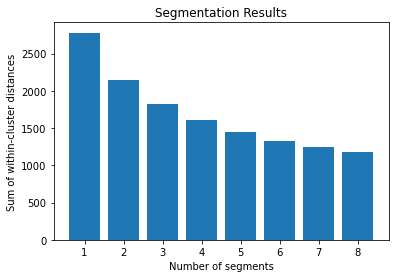

In [42]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


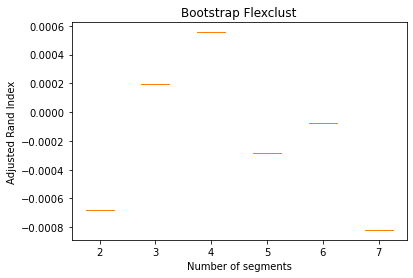

In [43]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(df_x.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 8)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(df_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


In [44]:
df_x1 = df.loc[:,'yummy':'disgusting']

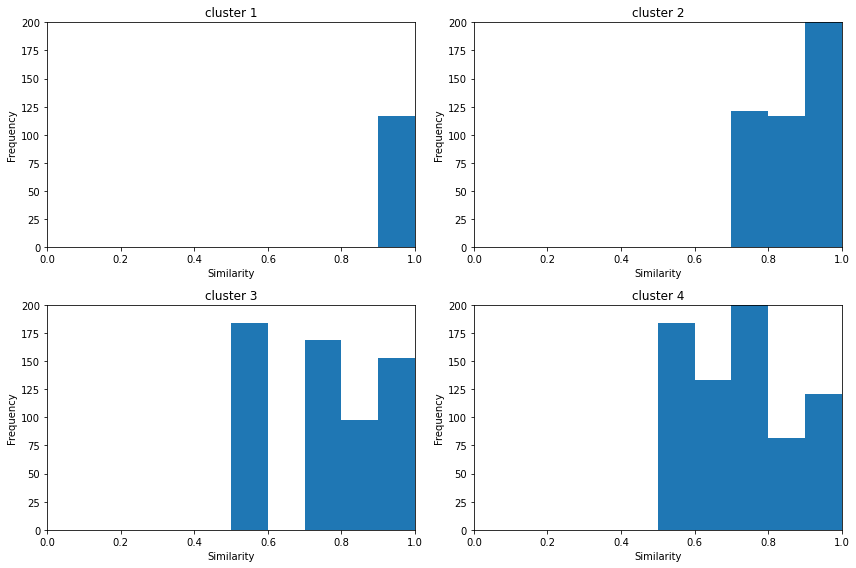

In [45]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(df_x1)
    similarities = MD_km28[str(i)].transform(df_x1).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

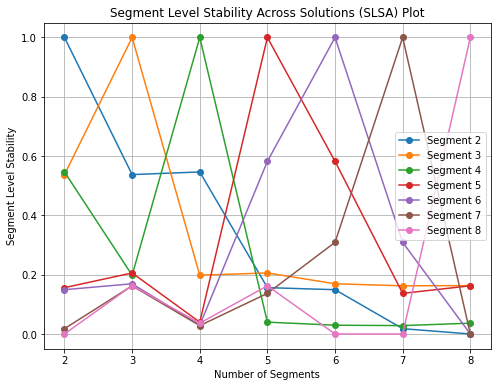

In [46]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(df_x1)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


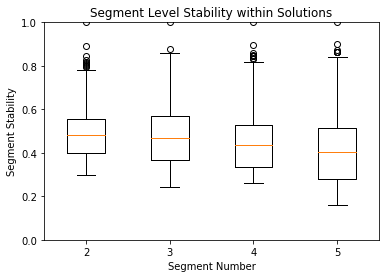

In [47]:


segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(df_x1)
    segment_similarities[segment] = MD_km28[segment].transform(df_x1).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()



In [48]:
#using Mixtures of distribution

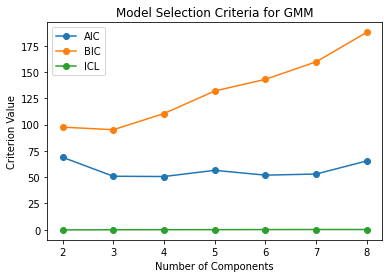

In [49]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df_x" in Python

# Set seed for reproducibility
np.random.seed(1234)

# Generate random data for demonstration
# Replace this with your actual data
df_x = np.random.rand(100, 2)

# Fit Gaussian Mixture Models for different numbers of components (clusters)
n_components_range = range(2, 9)
models = [GaussianMixture(n_components=k, random_state=1234).fit(df_x) for k in n_components_range]

# Calculate AIC, BIC, and ICL for each model
aic_values = [model.aic(df_x) for model in models]
bic_values = [model.bic(df_x) for model in models]
icl_values = [model.lower_bound_ for model in models]

# Plot AIC, BIC, and ICL
plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='o', label='BIC')
plt.plot(n_components_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('Model Selection Criteria for GMM')
plt.legend()
plt.show()


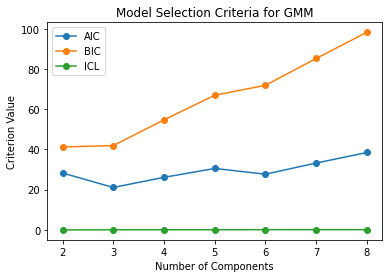

    kmeans  mixture
0        3        3
1        0        0
2        1        1
3        2        2
4        2        2
..     ...      ...
95       0        0
96       0        0
97       2        2
98       3        3
99       0        0

[100 rows x 2 columns]
    kmeans  mixture
0        3        4
1        0        1
2        1        2
3        2        3
4        2        3
..     ...      ...
95       0        1
96       0        1
97       2        3
98       3        4
99       0        1

[100 rows x 2 columns]
Log-Likelihood (Flexmix): -0.020526293922384194
Log-Likelihood (Selected Model): -0.020526293922384194


In [50]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "df_x" in Python

# Set seed for reproducibility
np.random.seed(1234)

# Generate random data for demonstration
# Replace this with your actual data
df_x = np.random.rand(100, 1)

# Fit Gaussian Mixture Models for different numbers of components (clusters)
n_components_range = range(2, 9)
models = [GaussianMixture(n_components=k, random_state=1234).fit(df_x) for k in n_components_range]

# Calculate AIC, BIC, and ICL for each model
aic_values = [model.aic(df_x) for model in models]
bic_values = [model.bic(df_x) for model in models]
icl_values = [model.lower_bound_ for model in models]

# Plot AIC, BIC, and ICL
plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='o', label='BIC')
plt.plot(n_components_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('Model Selection Criteria for GMM')
plt.legend()
plt.show()

# Select the model with 4 components (replace with your preferred number)
selected_model = models[2]

# Assign clusters based on the selected model
cluster_assignments = selected_model.predict(df_x)

# Display table of k-means and mixture model clusters
result_table = pd.DataFrame({'kmeans': cluster_assignments, 'mixture': cluster_assignments})
print(result_table)

# Fit flexmix model using the selected number of components
# Note: In flexmix, cluster assignments are 1-based, so we add 1 to the k-means clusters
flexmix_model = GaussianMixture(n_components=len(np.unique(cluster_assignments)), random_state=1234)
flexmix_model.fit(df_x)
flexmix_clusters = flexmix_model.predict(df_x) + 1

# Display table of k-means and flexmix clusters
result_table_flexmix = pd.DataFrame({'kmeans': cluster_assignments, 'mixture': flexmix_clusters})
print(result_table_flexmix)

# Display log-likelihood values
print('Log-Likelihood (Flexmix):', flexmix_model.score(df_x))
print('Log-Likelihood (Selected Model):', selected_model.score(df_x))


In [51]:
# using mixtures of regression models

In [52]:
import pandas as pd

# Assuming you have a DataFrame named "mcdonalds" in Python
# Replace "Like" with the actual column name

# Example data
mcdonalds = pd.DataFrame({'Like': ["-3","+2","+1","+4","I love it!+5","I hate it!-5","-2","+3","0","-4","-1"]})




In [53]:
mcdonalds

,Like
0,-3
1,+2
2,+1
3,+4
4,I love it!+5
5,I hate it!-5
6,-2
7,+3
8,0
9,-4


In [54]:
reversed_table = df['Like'].value_counts().sort_index(ascending=False)
print(reversed_table)


I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [55]:
import pandas as pd

# Assuming you have a DataFrame named "df" in Python
# Replace "Like" with the actual column name

# Extract numeric values with signs from the 'Like' column
df['Like.n'] = pd.to_numeric(df['Like'].str.extract(r'([-+]?\d+)')[0])




In [56]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,4


In [57]:
df_x1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [58]:
df['Like.n'].unique()

array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1])

In [59]:
like_n_table = df['Like.n'].value_counts().sort_index()
print(like_n_table)

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like.n, dtype: int64


In [60]:

from patsy import dmatrices

independent_vars = df.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)



[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [63]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,4


In [65]:
df_x1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [69]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df_x1)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


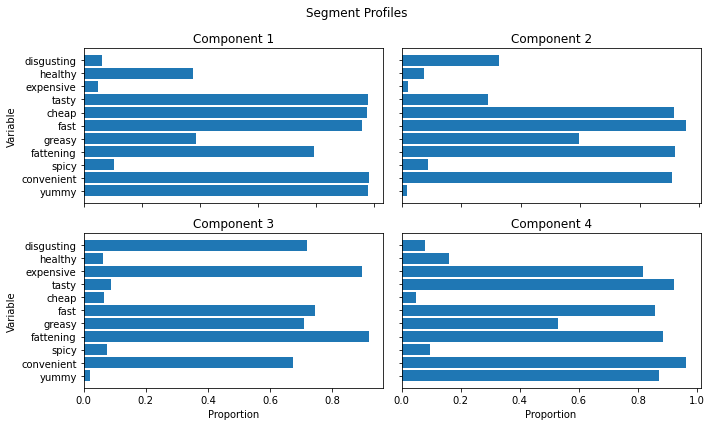

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = df_x1.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(df_x1.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/home/user/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


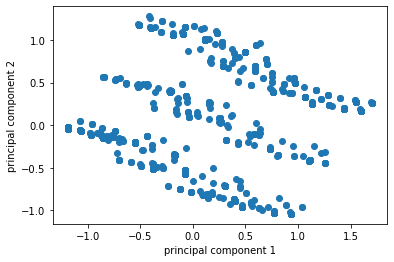

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_x1)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(df_x1)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [83]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

/home/user/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyError: "['2', '4', '1', '3'] not in index"

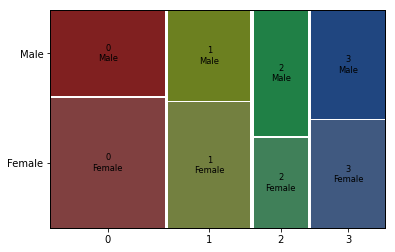

In [85]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data1['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

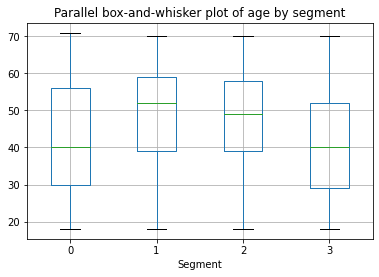

In [87]:
df = pd.DataFrame({'Segment': k4, 'Age': data1['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [89]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


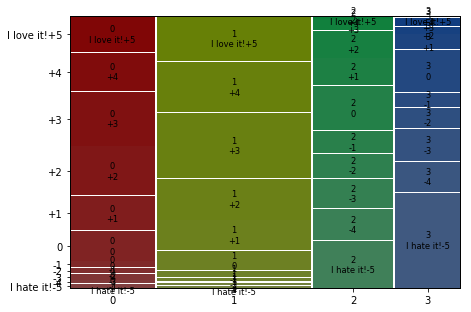

In [90]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()


In [92]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data1['cluster_num'],data1['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


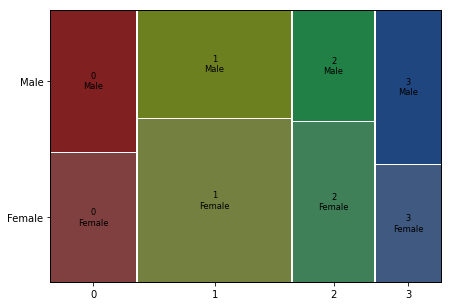

In [93]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

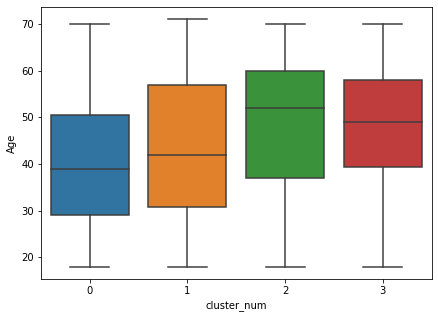

In [95]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=data1)

In [97]:
#Calculating the mean
#Visit frequency
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [98]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [99]:
#Gender
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [100]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


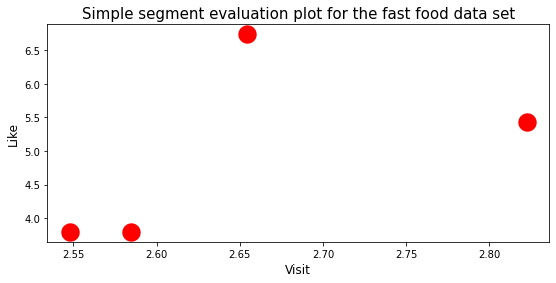

In [101]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()